# Part A

## Initialization

In [49]:
#Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import time

In [50]:
#Defining Functions

# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

In [51]:
#Set Variables
NUM_CLASSES = 3

epochs = 1000
batch_size = 32
num_neurons = 10
seed = 10

np.random.seed(seed)
tf.random.set_seed(seed)

histories = {}
timeTaken = {}

In [52]:
#Additional Variables
learning_rate = 0.01 #As defined in the assignment
decay = 0.000001 #As defined in the assignment

In [53]:

#read train data
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')
trainX,testX,trainY,testY=train_test_split(train_input[1:, :21], train_input[1:,-1].astype(int),
train_size=0.7,
test_size=0.3)
trainX = scale(trainX, np.min(trainX, axis=0), np.max(trainX, axis=0))
trainY = trainY-1


#Check shape of train set
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1488, 21)
(1488,)
(638, 21)
(638,)


## Q1

In [54]:
# create the model
ffn_model = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

In [55]:
#Fit the FFN model
histories['ffn'] = ffn_model.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

.3874 - accuracy: 0.3790 - val_loss: 1.5016 - val_accuracy: 0.0000e+00
Epoch 813/1000
47/47 - 0s - loss: 0.3874 - accuracy: 0.3790 - val_loss: 1.5016 - val_accuracy: 0.0000e+00
Epoch 814/1000
47/47 - 0s - loss: 0.3874 - accuracy: 0.3790 - val_loss: 1.5016 - val_accuracy: 0.0000e+00
Epoch 815/1000
47/47 - 0s - loss: 0.3874 - accuracy: 0.3790 - val_loss: 1.5016 - val_accuracy: 0.0000e+00
Epoch 816/1000
47/47 - 0s - loss: 0.3874 - accuracy: 0.3790 - val_loss: 1.5016 - val_accuracy: 0.0000e+00
Epoch 817/1000
47/47 - 0s - loss: 0.3874 - accuracy: 0.3790 - val_loss: 1.5016 - val_accuracy: 0.0000e+00
Epoch 818/1000
47/47 - 0s - loss: 0.3874 - accuracy: 0.3790 - val_loss: 1.5016 - val_accuracy: 0.0000e+00
Epoch 819/1000
47/47 - 0s - loss: 0.3874 - accuracy: 0.3784 - val_loss: 1.5016 - val_accuracy: 0.0000e+00
Epoch 820/1000
47/47 - 0s - loss: 0.3874 - accuracy: 0.3784 - val_loss: 1.5016 - val_accuracy: 0.0000e+00
Epoch 821/1000
47/47 - 0s - loss: 0.3874 - accuracy: 0.3790 - val_loss: 1.5016 - 

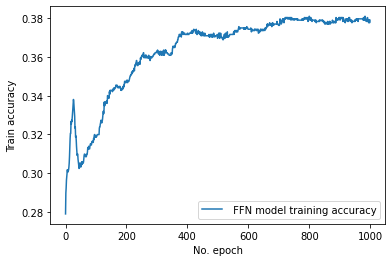

In [56]:
# Plot the Learning Curve
plt.plot(histories['ffn'].history['accuracy'], label=' FFN model training accuracy')
plt.ylabel('Train accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## Q2

In [57]:
#For 1000 epochs

#Fit the FFN model for batch size 4
histories['ffn_4'] = ffn_model.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=4, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

curacy: 0.0000e+00
Epoch 816/1000
372/372 - 0s - loss: 0.3873 - accuracy: 0.4321 - val_loss: 1.5010 - val_accuracy: 0.0000e+00
Epoch 817/1000
372/372 - 0s - loss: 0.3873 - accuracy: 0.4348 - val_loss: 1.5010 - val_accuracy: 0.0000e+00
Epoch 818/1000
372/372 - 0s - loss: 0.3873 - accuracy: 0.4315 - val_loss: 1.5010 - val_accuracy: 0.0000e+00
Epoch 819/1000
372/372 - 0s - loss: 0.3873 - accuracy: 0.4315 - val_loss: 1.5010 - val_accuracy: 0.0000e+00
Epoch 820/1000
372/372 - 0s - loss: 0.3873 - accuracy: 0.4288 - val_loss: 1.5010 - val_accuracy: 0.0000e+00
Epoch 821/1000
372/372 - 0s - loss: 0.3873 - accuracy: 0.4308 - val_loss: 1.5010 - val_accuracy: 0.0000e+00
Epoch 822/1000
372/372 - 0s - loss: 0.3873 - accuracy: 0.4301 - val_loss: 1.5010 - val_accuracy: 0.0000e+00
Epoch 823/1000
372/372 - 0s - loss: 0.3873 - accuracy: 0.4348 - val_loss: 1.5010 - val_accuracy: 0.0000e+00
Epoch 824/1000
372/372 - 0s - loss: 0.3873 - accuracy: 0.4315 - val_loss: 1.5010 - val_accuracy: 0.0000e+00
Epoch 825

In [58]:
#For 1000 epochs

#Fit the FFN model for batch size 8
histories['ffn_8'] = ffn_model.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=8, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

curacy: 0.0000e+00
Epoch 816/1000
186/186 - 0s - loss: 0.3873 - accuracy: 0.4368 - val_loss: 1.4987 - val_accuracy: 0.0000e+00
Epoch 817/1000
186/186 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4987 - val_accuracy: 0.0000e+00
Epoch 818/1000
186/186 - 0s - loss: 0.3873 - accuracy: 0.4375 - val_loss: 1.4986 - val_accuracy: 0.0000e+00
Epoch 819/1000
186/186 - 0s - loss: 0.3873 - accuracy: 0.4402 - val_loss: 1.4986 - val_accuracy: 0.0000e+00
Epoch 820/1000
186/186 - 0s - loss: 0.3873 - accuracy: 0.4341 - val_loss: 1.4986 - val_accuracy: 0.0000e+00
Epoch 821/1000
186/186 - 0s - loss: 0.3873 - accuracy: 0.4355 - val_loss: 1.4986 - val_accuracy: 0.0000e+00
Epoch 822/1000
186/186 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4986 - val_accuracy: 0.0000e+00
Epoch 823/1000
186/186 - 0s - loss: 0.3873 - accuracy: 0.4388 - val_loss: 1.4986 - val_accuracy: 0.0000e+00
Epoch 824/1000
186/186 - 0s - loss: 0.3873 - accuracy: 0.4368 - val_loss: 1.4986 - val_accuracy: 0.0000e+00
Epoch 825

In [59]:
#For 1000 epochs

#Fit the FFN model for batch size 16
histories['ffn_16'] = ffn_model.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=16, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

.3873 - accuracy: 0.4368 - val_loss: 1.4964 - val_accuracy: 0.0000e+00
Epoch 813/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4368 - val_loss: 1.4964 - val_accuracy: 0.0000e+00
Epoch 814/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4964 - val_accuracy: 0.0000e+00
Epoch 815/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4375 - val_loss: 1.4964 - val_accuracy: 0.0000e+00
Epoch 816/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4368 - val_loss: 1.4964 - val_accuracy: 0.0000e+00
Epoch 817/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4368 - val_loss: 1.4964 - val_accuracy: 0.0000e+00
Epoch 818/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4375 - val_loss: 1.4964 - val_accuracy: 0.0000e+00
Epoch 819/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4375 - val_loss: 1.4964 - val_accuracy: 0.0000e+00
Epoch 820/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4368 - val_loss: 1.4964 - val_accuracy: 0.0000e+00
Epoch 821/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4368 - val_loss: 1.4964 - 

In [60]:
#For 1000 epochs

#Fit the FFN model for batch size 32
histories['ffn_32'] = ffn_model.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=32, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

.3873 - accuracy: 0.4388 - val_loss: 1.4948 - val_accuracy: 0.0000e+00
Epoch 813/1000
47/47 - 0s - loss: 0.3873 - accuracy: 0.4388 - val_loss: 1.4948 - val_accuracy: 0.0000e+00
Epoch 814/1000
47/47 - 0s - loss: 0.3873 - accuracy: 0.4388 - val_loss: 1.4948 - val_accuracy: 0.0000e+00
Epoch 815/1000
47/47 - 0s - loss: 0.3873 - accuracy: 0.4395 - val_loss: 1.4948 - val_accuracy: 0.0000e+00
Epoch 816/1000
47/47 - 0s - loss: 0.3873 - accuracy: 0.4395 - val_loss: 1.4948 - val_accuracy: 0.0000e+00
Epoch 817/1000
47/47 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4948 - val_accuracy: 0.0000e+00
Epoch 818/1000
47/47 - 0s - loss: 0.3873 - accuracy: 0.4388 - val_loss: 1.4948 - val_accuracy: 0.0000e+00
Epoch 819/1000
47/47 - 0s - loss: 0.3873 - accuracy: 0.4388 - val_loss: 1.4948 - val_accuracy: 0.0000e+00
Epoch 820/1000
47/47 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4948 - val_accuracy: 0.0000e+00
Epoch 821/1000
47/47 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4948 - 

In [61]:
#For 1000 epochs

#Fit the FFN model for batch size 64
histories['ffn_64'] = ffn_model.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=64, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

.3873 - accuracy: 0.4388 - val_loss: 1.4940 - val_accuracy: 0.0000e+00
Epoch 813/1000
24/24 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4940 - val_accuracy: 0.0000e+00
Epoch 814/1000
24/24 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4940 - val_accuracy: 0.0000e+00
Epoch 815/1000
24/24 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4940 - val_accuracy: 0.0000e+00
Epoch 816/1000
24/24 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4940 - val_accuracy: 0.0000e+00
Epoch 817/1000
24/24 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4940 - val_accuracy: 0.0000e+00
Epoch 818/1000
24/24 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4939 - val_accuracy: 0.0000e+00
Epoch 819/1000
24/24 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4939 - val_accuracy: 0.0000e+00
Epoch 820/1000
24/24 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4939 - val_accuracy: 0.0000e+00
Epoch 821/1000
24/24 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4939 - 

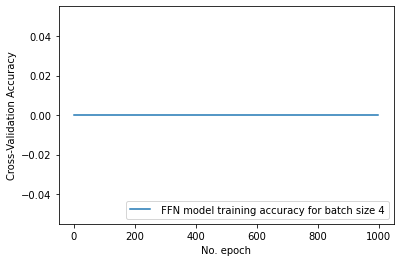

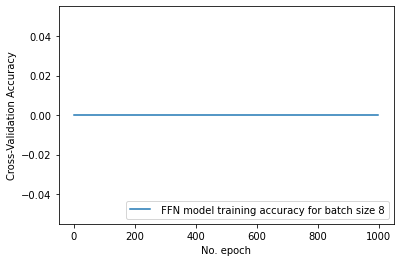

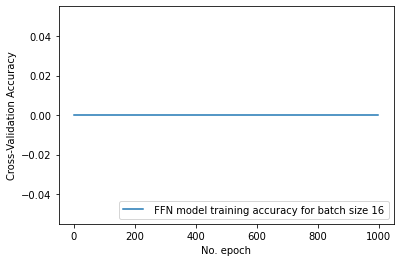

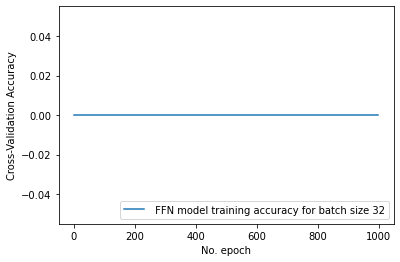

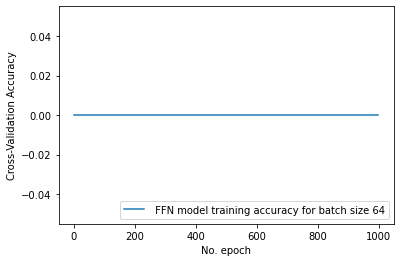

In [62]:
# Plot all Learning Curves
#Plot Batch size 4
plt.plot(histories['ffn_4'].history['val_accuracy'], label=' FFN model training accuracy for batch size 4')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#plot batch size 8
plt.plot(histories['ffn_8'].history['val_accuracy'], label=' FFN model training accuracy for batch size 8')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#plot batch size 16
plt.plot(histories['ffn_16'].history['val_accuracy'], label=' FFN model training accuracy for batch size 16')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#plot batch size 32
plt.plot(histories['ffn_32'].history['val_accuracy'], label=' FFN model training accuracy for batch size 32')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#plot batch size 64
plt.plot(histories['ffn_64'].history['val_accuracy'], label=' FFN model training accuracy for batch size 64')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()


In [63]:
#For 1 epoch

#Initialize start time
start = time.process_time()
#Fit the FFN model for batch size 4
histories['ffn_4_1'] = ffn_model.fit(trainX, trainY, 
                    epochs=1, 
                    batch_size=4, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))
#Store time taken
timeTaken[4] = time.process_time() - start

372/372 - 0s - loss: 0.3873 - accuracy: 0.4409 - val_loss: 1.4938 - val_accuracy: 0.0000e+00


In [64]:
#For 1 epoch

#Initialize start time
start = time.process_time()
#Fit the FFN model for batch size 8
histories['ffn_8_1'] = ffn_model.fit(trainX, trainY, 
                    epochs=1, 
                    batch_size=8, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))
#Store time taken
timeTaken[8] = time.process_time() - start

186/186 - 0s - loss: 0.3873 - accuracy: 0.4382 - val_loss: 1.4938 - val_accuracy: 0.0000e+00


In [65]:
#For 1 epoch

#Initialize start time
start = time.process_time()
#Fit the FFN model for batch size 16
histories['ffn_16_1'] = ffn_model.fit(trainX, trainY, 
                    epochs=1, 
                    batch_size=16, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))
#Store time taken
timeTaken[16] = time.process_time() - start

93/93 - 0s - loss: 0.3873 - accuracy: 0.4375 - val_loss: 1.4938 - val_accuracy: 0.0000e+00


In [66]:
#For 1 epoch

#Initialize start time
start = time.process_time()
#Fit the FFN model for batch size 32
histories['ffn_32_1'] = ffn_model.fit(trainX, trainY, 
                    epochs=1, 
                    batch_size=32, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))
#Store time taken
timeTaken[32] = time.process_time() - start

47/47 - 0s - loss: 0.3873 - accuracy: 0.4368 - val_loss: 1.4938 - val_accuracy: 0.0000e+00


In [67]:
#For 1 epoch

#Initialize start time
start = time.process_time()
#Fit the FFN model for batch size 64
histories['ffn_64_1'] = ffn_model.fit(trainX, trainY, 
                    epochs=1, 
                    batch_size=64, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))
#Store time taken
timeTaken[64] = time.process_time() - start
print(timeTaken[64])

24/24 - 0s - loss: 0.3873 - accuracy: 0.4368 - val_loss: 1.4938 - val_accuracy: 0.0000e+00
0.140625


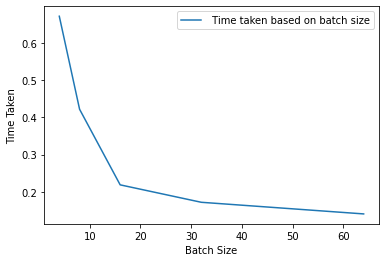

In [68]:
batchsizes=[4,8,16,32,64]

time = [timeTaken[4],timeTaken[8],timeTaken[16],timeTaken[32],timeTaken[64]]

#plot batch size again time taken
plt.plot(batchsizes, time, label=' Time taken based on batch size')
plt.ylabel('Time Taken')
plt.xlabel('Batch Size')
plt.legend(loc="upper right")
plt.show()

In [78]:
#Select 16 as the optimal batch size
batch_size = 16

In [79]:
#Fit the FFN model for train
histories['ffn_train'] = ffn_model.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True)

- accuracy: 0.4099
Epoch 668/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4093
Epoch 669/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4086
Epoch 670/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4093
Epoch 671/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4093
Epoch 672/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4099
Epoch 673/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4099
Epoch 674/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4099
Epoch 675/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4093
Epoch 676/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4099
Epoch 677/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4099
Epoch 678/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4086
Epoch 679/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4099
Epoch 680/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4079
Epoch 681/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4086
Epoch 682/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4093
Epoch 683/1000
93/93 - 0s - loss: 0.3873 - accuracy: 0.4099
Epoch 684/1000
93/93 

In [80]:
#Fit the FFN model for test
histories['ffn_test'] = ffn_model.fit(testX, testY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True)

- accuracy: 0.7790
Epoch 668/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 669/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 670/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 671/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 672/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 673/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 674/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 675/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 676/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 677/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 678/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 679/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 680/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 681/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 682/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 683/1000
40/40 - 0s - loss: 1.5016 - accuracy: 0.7790
Epoch 684/1000
40/40 

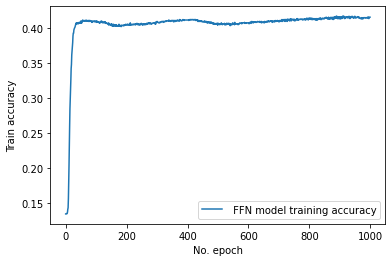

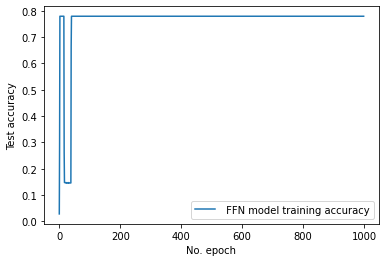

In [83]:
# Plot all Learning Curves for optimal batch size
#Plot Train
plt.plot(histories['ffn_train'].history['accuracy'], label=' FFN model training accuracy')
plt.ylabel('Train accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#Plot Test
plt.plot(histories['ffn_test'].history['accuracy'], label=' FFN model training accuracy')
plt.ylabel('Test accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## Q3)

In [86]:
#Hidden layers
# create the model
ffn_model_hl = keras.Sequential([
    keras.layers.Dense(5, activation='relu', kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_hl.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])


#Fit the FFN model for 5 hidden layers neurons
histories['ffn_hl_5'] = ffn_model_hl.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

000
93/93 - 0s - loss: 0.3874 - accuracy: 0.4328 - val_loss: 1.4675 - val_accuracy: 0.0016
Epoch 813/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.4335 - val_loss: 1.4676 - val_accuracy: 0.0016
Epoch 814/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.4348 - val_loss: 1.4678 - val_accuracy: 0.0016
Epoch 815/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.4348 - val_loss: 1.4680 - val_accuracy: 0.0016
Epoch 816/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.4355 - val_loss: 1.4682 - val_accuracy: 0.0016
Epoch 817/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.4348 - val_loss: 1.4685 - val_accuracy: 0.0016
Epoch 818/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.4348 - val_loss: 1.4687 - val_accuracy: 0.0000e+00
Epoch 819/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.4362 - val_loss: 1.4689 - val_accuracy: 0.0000e+00
Epoch 820/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.4341 - val_loss: 1.4691 - val_accuracy: 0.0000e+00
Epoch 821/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.4362 - val_loss: 1.4694 - 

In [87]:
#Hidden layers
# create the model
ffn_model_hl = keras.Sequential([
    keras.layers.Dense(10, activation='relu',kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_hl.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])


#Fit the FFN model for 10 hidden layers neurons
histories['ffn_hl_10'] = ffn_model_hl.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.1285
Epoch 805/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3905 - val_loss: 1.4832 - val_accuracy: 0.1270
Epoch 806/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3911 - val_loss: 1.4832 - val_accuracy: 0.1270
Epoch 807/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3911 - val_loss: 1.4832 - val_accuracy: 0.1270
Epoch 808/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3918 - val_loss: 1.4832 - val_accuracy: 0.1270
Epoch 809/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3911 - val_loss: 1.4832 - val_accuracy: 0.1270
Epoch 810/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3911 - val_loss: 1.4832 - val_accuracy: 0.1270
Epoch 811/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3911 - val_loss: 1.4832 - val_accuracy: 0.1270
Epoch 812/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3911 - val_loss: 1.4832 - val_accuracy: 0.1270
Epoch 813/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3918 - val_loss: 1.4832 - val_accuracy: 0.1270
Epoch 814/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3918 - val_loss: 1.4

In [88]:
#Hidden layers
# create the model
ffn_model_hl = keras.Sequential([
    keras.layers.Dense(15, activation='relu',kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_hl.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])


#Fit the FFN model for 15 hidden layers neurons
histories['ffn_hl_15'] = ffn_model_hl.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.2006
Epoch 805/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3952 - val_loss: 1.4521 - val_accuracy: 0.2006
Epoch 806/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3938 - val_loss: 1.4521 - val_accuracy: 0.2006
Epoch 807/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3938 - val_loss: 1.4521 - val_accuracy: 0.2006
Epoch 808/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3952 - val_loss: 1.4520 - val_accuracy: 0.2006
Epoch 809/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3952 - val_loss: 1.4520 - val_accuracy: 0.2006
Epoch 810/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3945 - val_loss: 1.4520 - val_accuracy: 0.2006
Epoch 811/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3945 - val_loss: 1.4519 - val_accuracy: 0.2006
Epoch 812/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3945 - val_loss: 1.4519 - val_accuracy: 0.2006
Epoch 813/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3945 - val_loss: 1.4519 - val_accuracy: 0.2006
Epoch 814/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3952 - val_loss: 1.4

In [89]:
#Hidden layers
# create the model
ffn_model_hl = keras.Sequential([
    keras.layers.Dense(20, activation='relu',kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_hl.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])


#Fit the FFN model for 20 hidden layers neurons
histories['ffn_hl_20'] = ffn_model_hl.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.3699
Epoch 805/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3219 - val_loss: 1.4930 - val_accuracy: 0.3699
Epoch 806/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3219 - val_loss: 1.4930 - val_accuracy: 0.3699
Epoch 807/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3233 - val_loss: 1.4930 - val_accuracy: 0.3699
Epoch 808/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3219 - val_loss: 1.4930 - val_accuracy: 0.3699
Epoch 809/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3219 - val_loss: 1.4930 - val_accuracy: 0.3699
Epoch 810/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3226 - val_loss: 1.4930 - val_accuracy: 0.3699
Epoch 811/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3206 - val_loss: 1.4930 - val_accuracy: 0.3699
Epoch 812/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3226 - val_loss: 1.4930 - val_accuracy: 0.3699
Epoch 813/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3226 - val_loss: 1.4930 - val_accuracy: 0.3699
Epoch 814/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3226 - val_loss: 1.4

In [90]:
#Hidden layers
# create the model
ffn_model_hl = keras.Sequential([
    keras.layers.Dense(25, activation='relu',kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_hl.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])


#Fit the FFN model for 25 hidden layers neurons
histories['ffn_hl_25'] = ffn_model_hl.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.7696
Epoch 805/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3044 - val_loss: 1.4989 - val_accuracy: 0.7696
Epoch 806/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3044 - val_loss: 1.4989 - val_accuracy: 0.7696
Epoch 807/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3044 - val_loss: 1.4989 - val_accuracy: 0.7696
Epoch 808/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3038 - val_loss: 1.4989 - val_accuracy: 0.7696
Epoch 809/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3038 - val_loss: 1.4989 - val_accuracy: 0.7696
Epoch 810/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3051 - val_loss: 1.4989 - val_accuracy: 0.7696
Epoch 811/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3044 - val_loss: 1.4989 - val_accuracy: 0.7696
Epoch 812/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3051 - val_loss: 1.4989 - val_accuracy: 0.7696
Epoch 813/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3038 - val_loss: 1.4989 - val_accuracy: 0.7696
Epoch 814/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3044 - val_loss: 1.4

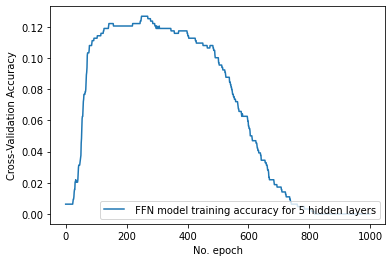

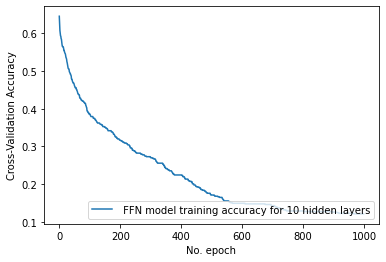

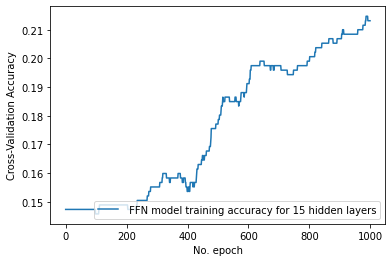

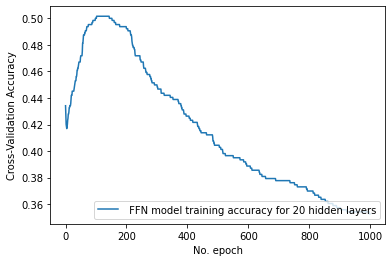

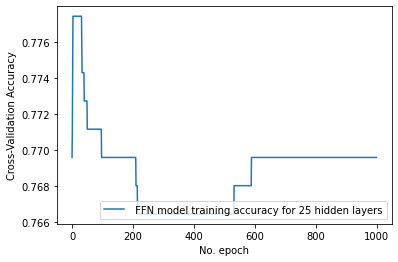

In [91]:
# Plot all Learning Curves
#Plot Hidden Layer 5
plt.plot(histories['ffn_hl_5'].history['val_accuracy'], label=' FFN model training accuracy for 5 hidden layers')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#Plot Hidden Layer 10
plt.plot(histories['ffn_hl_10'].history['val_accuracy'], label=' FFN model training accuracy for 10 hidden layers')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#Plot Hidden Layer 15
plt.plot(histories['ffn_hl_15'].history['val_accuracy'], label=' FFN model training accuracy for 15 hidden layers')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#Plot Hidden Layer 20
plt.plot(histories['ffn_hl_20'].history['val_accuracy'], label=' FFN model training accuracy for 20 hidden layers')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#Plot Hidden Layer 25
plt.plot(histories['ffn_hl_25'].history['val_accuracy'], label=' FFN model training accuracy for 25 hidden layers')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [94]:
#Optimal Selection for number of neurons for hidden layer
num_neurons = 15

In [95]:
#Hidden layers of optimal number of neurons
# create the model
ffn_model_hl = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_hl.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])


#Fit the FFN model for 10 hidden layers neurons (Train Set)
histories['ffn_hl_opt_train'] = ffn_model_hl.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

.3874 - accuracy: 0.3118 - val_loss: 1.5015 - val_accuracy: 0.0000e+00
Epoch 813/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3112 - val_loss: 1.5015 - val_accuracy: 0.0000e+00
Epoch 814/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3118 - val_loss: 1.5015 - val_accuracy: 0.0000e+00
Epoch 815/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3112 - val_loss: 1.5015 - val_accuracy: 0.0000e+00
Epoch 816/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3112 - val_loss: 1.5015 - val_accuracy: 0.0000e+00
Epoch 817/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3112 - val_loss: 1.5015 - val_accuracy: 0.0000e+00
Epoch 818/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3112 - val_loss: 1.5015 - val_accuracy: 0.0000e+00
Epoch 819/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3105 - val_loss: 1.5015 - val_accuracy: 0.0000e+00
Epoch 820/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3105 - val_loss: 1.5015 - val_accuracy: 0.0000e+00
Epoch 821/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.3112 - val_loss: 1.5015 - 

In [96]:
#Fit the FFN model for 10 hidden layers neurons (Test Set)
histories['ffn_hl_opt_test'] = ffn_model_hl.fit(testX, testY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True)

- accuracy: 0.5063
Epoch 668/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.5110
Epoch 669/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.4796
Epoch 670/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.5016
Epoch 671/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.4765
Epoch 672/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.4953
Epoch 673/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.5141
Epoch 674/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.5016
Epoch 675/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.5016
Epoch 676/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.4937
Epoch 677/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.4937
Epoch 678/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.5047
Epoch 679/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.5235
Epoch 680/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.4984
Epoch 681/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.4781
Epoch 682/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.5266
Epoch 683/1000
40/40 - 0s - loss: 1.2794 - accuracy: 0.4843
Epoch 684/1000
40/40 

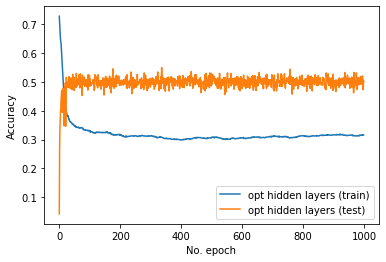

In [98]:
#Plot Hidden Layer 10 of train and test
plt.plot(histories['ffn_hl_opt_train'].history['accuracy'], label='opt hidden layers (train)')
plt.plot(histories['ffn_hl_opt_test'].history['accuracy'], label='opt hidden layers (test)')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## Part A Q4

In [100]:
#Find optimal decay
# create the model
ffn_model_decay = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(0)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_decay.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])


#Fit the FFN model for 0 decay
histories['ffn_d_0'] = ffn_model_decay.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.7790
Epoch 805/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.2110 - val_loss: 1.4946 - val_accuracy: 0.7790
Epoch 806/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.2110 - val_loss: 1.4946 - val_accuracy: 0.7790
Epoch 807/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.2110 - val_loss: 1.4946 - val_accuracy: 0.7790
Epoch 808/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.2110 - val_loss: 1.4945 - val_accuracy: 0.7790
Epoch 809/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.2103 - val_loss: 1.4945 - val_accuracy: 0.7790
Epoch 810/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.2124 - val_loss: 1.4945 - val_accuracy: 0.7790
Epoch 811/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.2110 - val_loss: 1.4945 - val_accuracy: 0.7790
Epoch 812/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.2124 - val_loss: 1.4945 - val_accuracy: 0.7790
Epoch 813/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.2117 - val_loss: 1.4944 - val_accuracy: 0.7790
Epoch 814/1000
93/93 - 0s - loss: 0.3874 - accuracy: 0.2137 - val_loss: 1.4

In [103]:
#Find optimal decay
# create the model
ffn_model_decay = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(10^-3)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_decay.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])


#Fit the FFN model for 10^-3 decay
histories['ffn_d_3'] = ffn_model_decay.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

poch 801/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 802/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 803/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 804/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 805/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 806/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 807/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 808/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 809/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 810/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
E

In [104]:
#Find optimal decay
# create the model
ffn_model_decay = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(10^-6)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_decay.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])


#Fit the FFN model for 10^-6 decay
histories['ffn_d_6'] = ffn_model_decay.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

poch 801/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 802/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 803/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 804/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 805/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 806/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 807/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 808/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 809/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 810/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
E

In [105]:
#Find optimal decay
# create the model
ffn_model_decay = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(10^-9)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_decay.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])


#Fit the FFN model for 10^-9 decay
histories['ffn_d_9'] = ffn_model_decay.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

poch 801/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 802/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 803/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 804/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 805/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 806/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 807/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 808/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 809/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 810/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
E

In [106]:
#Find optimal decay
# create the model
ffn_model_decay = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(10^-12)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_decay.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])


#Fit the FFN model for 10^-12 decay
histories['ffn_d_12'] = ffn_model_decay.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

poch 801/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 802/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 803/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 804/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 805/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 806/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 807/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 808/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 809/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 810/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
E

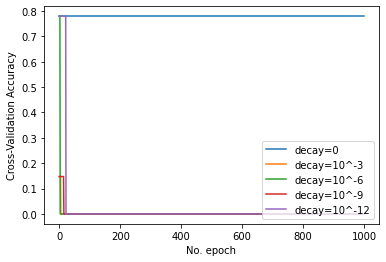

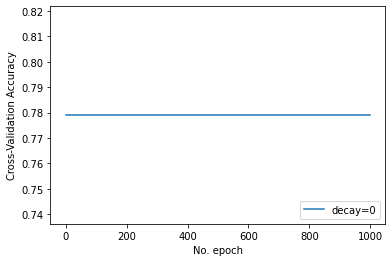

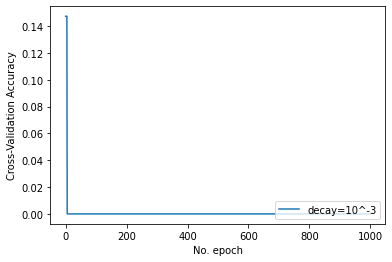

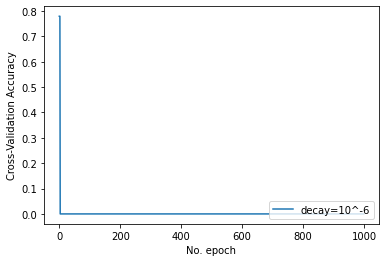

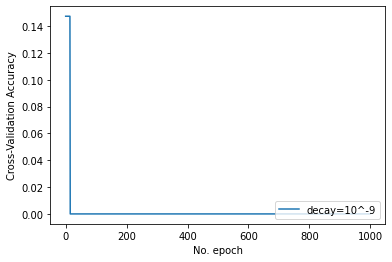

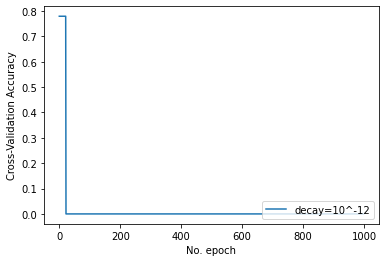

In [113]:
# Plot all Learning Curves
#Plot Decays
plt.plot(histories['ffn_d_0'].history['val_accuracy'], label='decay=0')
plt.plot(histories['ffn_d_3'].history['val_accuracy'], label='decay=10^-3')
plt.plot(histories['ffn_d_6'].history['val_accuracy'], label='decay=10^-6')
plt.plot(histories['ffn_d_9'].history['val_accuracy'], label='decay=10^-9')
plt.plot(histories['ffn_d_12'].history['val_accuracy'], label='decay=10^-12')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#Plot Decays
plt.plot(histories['ffn_d_0'].history['val_accuracy'], label='decay=0')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

plt.plot(histories['ffn_d_3'].history['val_accuracy'], label='decay=10^-3')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

plt.plot(histories['ffn_d_6'].history['val_accuracy'], label='decay=10^-6')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

plt.plot(histories['ffn_d_9'].history['val_accuracy'], label='decay=10^-9')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

plt.plot(histories['ffn_d_12'].history['val_accuracy'], label='decay=10^-12')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()


In [118]:
#Optimal Decay Parameter
decay=10^-6

In [119]:
# create the model
ffn_model_decay = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_decay.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

#Fit the FFN model for optical decay (Test Set)
histories['ffn_d_opt_test'] = ffn_model_decay.fit(testX, testY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True)

/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 674/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 675/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 676/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 677/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 678/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 679/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 680/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 681/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 682/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 683/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 684/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 685/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 686/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 687/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 688/1000
40/40 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 689/1000
40/40 - 0s - loss:

In [120]:
#Fit the FFN model for optical decay (Train Set)
histories['ffn_d_opt_train'] = ffn_model_decay.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

poch 801/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 802/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 803/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 804/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 805/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 806/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 807/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 808/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 809/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 810/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
E

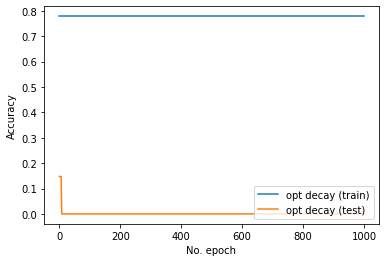

In [121]:
#Plot optimal decay of train and test
plt.plot(histories['ffn_d_opt_train'].history['accuracy'], label='opt decay (train)')
plt.plot(histories['ffn_d_opt_test'].history['accuracy'], label='opt decay (test)')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## Q5

In [127]:
# create the 4-layered model
ffn_model_4layer = keras.Sequential([
    keras.layers.Dense(10, activation='relu',kernel_regularizer=l2(10^-6)),
    keras.layers.Dense(10, activation='relu',kernel_regularizer=l2(10^-6)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_4layer.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

#Fit the FFN model for optical decay (Test Set)
histories['ffn_4_layer_test'] = ffn_model_4layer.fit(testX, testY, 
                    epochs=epochs, 
                    batch_size=32, 
                    verbose = 2, 
                    use_multiprocessing=True)

/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 674/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 675/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 676/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 677/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 678/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 679/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 680/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 681/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 682/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 683/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 684/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 685/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 686/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 687/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 688/1000
20/20 - 0s - loss: nan - accuracy: 0.0000e+00
Epoch 689/1000
20/20 - 0s - loss:

In [128]:
#Fit the FFN model for optical decay (Train Set)
histories['ffn_4_layer_train'] = ffn_model_4layer.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=32, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

poch 801/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 802/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 803/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 804/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 805/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 806/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 807/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 808/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 809/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 810/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.0000e+00
E

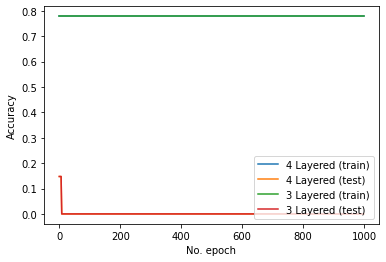

In [129]:
#Plot optimal decay of train and test
plt.plot(histories['ffn_4_layer_train'].history['accuracy'], label='4 Layered (train)')
plt.plot(histories['ffn_4_layer_test'].history['accuracy'], label='4 Layered (test)')
plt.plot(histories['ffn_d_opt_train'].history['accuracy'], label='3 Layered (train)')
plt.plot(histories['ffn_d_opt_test'].history['accuracy'], label='3 Layered (test)')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()